In [1]:
import os
import pathlib
import sys
import random
import math
import re
import time
import numpy as np
import skimage
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# ルートの設定
ROOT_DIR = os.path.abspath("../Mask_RCNN")

# Mask R-CNN関連のパッケージのインポート
sys.path.append(ROOT_DIR)
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

# 学習用のモデルweightファイル
COCO_MODEL_PATH = os.path.join("../models", "mask_rcnn_coco.h5")

Using TensorFlow backend.


# 実行の設定

In [3]:
# 既存のクラスの設定の読み込っみ(samples/coco/coco.py)
# NUM_CLASSES = 1 + 80  # COCO has 80 classes
from samples.coco import coco
config = coco.CocoConfig()

print("---config = coco.CocoConfig()---")
config.display()

## 学習用の設定を上書きし推論用のパラメータを設定する
class InferenceConfig(config.__class__):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
config = InferenceConfig()

print("---config = InferenceConfig()---")
config.display()

# デバイスとモードの設定
DEVICE = "/cpu:0"
TEST_MODE = "inference"

---config = coco.CocoConfig()---

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE      

# モデルの読み出し

In [4]:
# ログディレクトリ
MODEL_DIR = "../models/logs"

# モデルの設定読み込み
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,config=config)
model.load_weights(COCO_MODEL_PATH, by_name=True)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.







2024-02-16 22:17:56.063872: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2024-02-16 22:17:56.072495: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1896390000 Hz
2024-02-16 22:17:56.075876: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55b2697610a0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-02-16 22:17:56.075959: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


# 推論

In [5]:
# 推論対象の画像リスト
image_path_list = ["../data/val2017/000000214539.jpg", "../data/val2017/000000047121.jpg"]

In [6]:
model_outputs = []
for image_path in image_path_list:
    # 画像読み込み
    image = skimage.io.imread(image_path)

    # 推論実行
    model_outputs += model.detect([image], verbose=1)

Processing 1 images
image                    shape: (427, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


In [7]:
model_outputs

[{'rois': array([[ 92, 231, 349, 442],
         [ 57, 562, 341, 640],
         [311, 265, 346, 305],
         [157, 480, 261, 515],
         [189,  43, 288, 116],
         [189, 186, 276, 243],
         [195, 116, 283, 166],
         [191, 141, 278, 195],
         [194,  92, 277, 122],
         [186, 173, 251, 201],
         [192, 228, 260, 259],
         [186,  41, 245,  63],
         [198, 466, 248, 482]], dtype=int32),
  'class_ids': array([ 1,  1, 33,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int32),
  'scores': array([0.9999378 , 0.9998252 , 0.99974424, 0.9971794 , 0.99630016,
         0.9952526 , 0.99486995, 0.9919992 , 0.96340185, 0.900529  ,
         0.8559699 , 0.7595565 , 0.70648336], dtype=float32),
  'masks': array([[[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [Fals

# 評価

In [8]:
from typing import List, Tuple, Dict
import matplotlib
from PIL import Image, ImageDraw
import json
from collections import defaultdict
from mrcnn import utils
from mrcnn import visualize

In [9]:
def groupby_class_id_gt(class_ids: np.ndarray, mask: np.ndarray, bbox: np.ndarray) -> Dict:
    uniq_class_list = np.unique(class_ids)
    results = {}    
    for cls in uniq_class_list:
        cls_idx = np.where(class_ids==cls)[0]
        if cls in results:
            results[cls]["class_ids"] = np.concatenate([results[cls]["class_ids"], class_ids[cls_idx]])
            results[cls]["mask"] = np.concatenate([results[cls]["mask"], mask[:,:,cls_idx]], axis=2)
            results[cls]["bbox"] = np.concatenate([results[cls]["bbox"], bbox[cls_idx]])            
        else:
            results[cls] = {}
            results[cls]["class_ids"] =class_ids[cls_idx]
            results[cls]["mask"] = mask[:,:,cls_idx]
            results[cls]["bbox"] = bbox[cls_idx]
    return results

In [10]:
def build_gt_mask(annotations: List, image_path: str) -> Tuple[np.ndarray, np.ndarray]:
    image_id = int(pathlib.Path(image_path).stem)
    annotation_list = [ann for ann in annotations if ann["image_id"]==image_id]
    
    instance_masks = []
    class_ids = []

    for annotation in annotation_list:
        class_id = annotation["category_id"]
        image = skimage.io.imread(image_path)
        mask = Image.new("1", (image.shape[1], image.shape[0]))
        mask_draw = ImageDraw.ImageDraw(mask, "1")
        for segmentation in annotation["segmentation"]:
            try:
                mask_draw.polygon(segmentation, fill=1)
                bool_array = np.array(mask) > 0
                instance_masks.append(bool_array)
                class_ids.append(class_id)
            except:
                print("skip")
                print(segmentation)

    mask = np.dstack(instance_masks)
    class_ids = np.array(class_ids, dtype=np.int32)

    return mask, class_ids

In [11]:
def build_gt_bboxs(annotations: List, image_path: str) -> Tuple[np.ndarray, np.ndarray]:
    image_id = int(pathlib.Path(image_path).stem)
    annotation_list = [ann for ann in annotations if ann["image_id"]==image_id]
    
    bboxs = []
    class_ids = []

    for annotation in annotation_list:
        class_id = annotation['category_id']
        bbox = annotation["bbox"]
        bboxs.append(bbox)
        class_ids.append(class_id)
    bboxs = np.array(bboxs)
    class_ids = np.array(class_ids, dtype=np.int32)

    return bboxs, class_ids

In [12]:
def get_ax(rows=1, cols=1, size=16) -> matplotlib.axes:
    """Return a Matplotlib Axes array for visualizing
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [13]:
# アノテーションデータのload
with open("../data/annotations/instances_val2017.json", "r") as f:
    gt = json.load(f)

In [17]:
# AP計算のためのiouの閾値を設定
iou_threshold=0.5

APs = []
for pred, image_path in zip(model_outputs, image_path_list):
    # 当該画像におけるbboxの正解データをアノテーションから抽出
    gt_bbox, _ = build_gt_bboxs(gt["annotations"], image_path)
    # 当該画像におけるmaskの正解データをアノテーションから抽出
    gt_mask, gt_class_ids = build_gt_mask(gt["annotations"], image_path)
    gt_per_class = groupby_class_id_gt(gt_class_ids, gt_mask, gt_bbox)

    tmpAP = defaultdict(float)
    for cls in gt_per_class.keys():
        # 参照
        # https://github.com/matterport/Mask_RCNN/blob/master/mrcnn/utils.py
        # mrcnnライブラリを使わないのであれば、`utils.py`を分解して独自に作成する
        AP, precisions, recalls, IoUs = utils.compute_ap(
            gt_per_class[cls]["bbox"], gt_per_class[cls]["class_ids"], gt_per_class[cls]["mask"],
            pred["rois"], pred["class_ids"], pred["scores"], pred["masks"],
            iou_threshold=iou_threshold
        )
        # mAPを計算するためにクラス毎のAPを保存しておく
        tmpAP[cls] = AP
    APs.append(tmpAP)

skip
counts
skip
size


In [18]:
APs

[defaultdict(float, {1: 0.3598901139838355, 15: 0.0, 37: 0.0}),
 defaultdict(float, {17: 0.0, 44: 0.0, 51: 0.0, 81: 0.0})]

In [17]:
# 推定クラス, GTクラス
pred["class_ids"], gt_class_ids

(array([16, 40, 46, 72], dtype=int32), array([17, 44, 51, 81], dtype=int32))

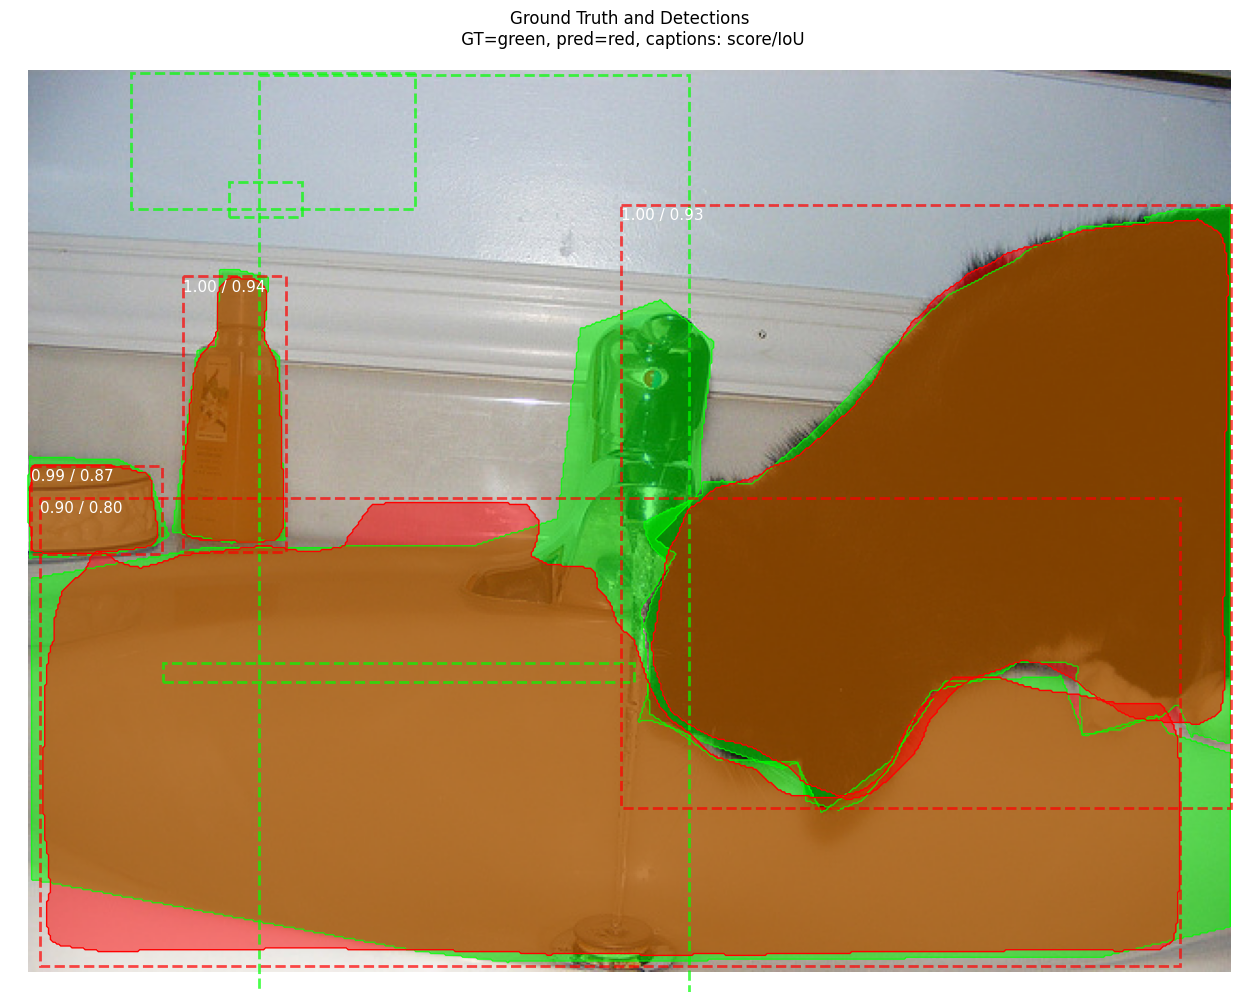

In [18]:
%matplotlib inline
class_names = list(range(100))
visualize.display_differences(
    skimage.io.imread(image_path_list[-1]),
    gt_bbox, gt_class_ids, gt_mask,
    pred["rois"], pred["class_ids"], pred["scores"], pred["masks"],
    class_names, ax=get_ax(),
    show_box=True, show_mask=True,
    iou_threshold=0.6, score_threshold=0.6)

In [20]:
for pred, image_path in zip(model_outputs, image_path_list):
    gt_bbox, _ = build_gt_bboxs(gt["annotations"], image_path)
    gt_mask, gt_class_ids = build_gt_mask(gt["annotations"], image_path)
    
    print(utils.compute_ap_range(
        gt_bbox, gt_class_ids, gt_mask,
        pred["rois"], pred["class_ids"], pred["scores"], pred["masks"])
    )

skip
counts
skip
size
AP @0.50:	 0.275
AP @0.55:	 0.275
AP @0.60:	 0.246
AP @0.65:	 0.246
AP @0.70:	 0.246
AP @0.75:	 0.088
AP @0.80:	 0.049
AP @0.85:	 0.029
AP @0.90:	 0.000
AP @0.95:	 0.000
AP @0.50-0.95:	 0.145
0.14544818368518636
AP @0.50:	 0.000
AP @0.55:	 0.000
AP @0.60:	 0.000
AP @0.65:	 0.000
AP @0.70:	 0.000
AP @0.75:	 0.000
AP @0.80:	 0.000
AP @0.85:	 0.000
AP @0.90:	 0.000
AP @0.95:	 0.000
AP @0.50-0.95:	 0.000
0.0
